<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Qichen(Lead), Paritosh, Rawal, Yan, Zen, Wen-Hsuan

## Submission Instructions:

1. Submit the PDF version of `theory.ipynb` to HW3:PDF. The `theory.ipynb` should include **ALL the writeup answers AND ALL the screenshots of code** specifically required in questions **from Q1 to Q7**. This section will be manually Graded.

2. Submit `q2.ipynb`, `q3.ipynb`, `q5.ipynb` to HW3:Code. Please do not submit other jupyter notebooks as they will not be autograded. Submitting them may cause running time out. (`q5.ipynb` is optional for extra credits)

**The Appendix section at the end of this file would help you on questions P1 and P2.**

## Q1 Theory Questions  (45 points)

### Q1.1 (4 Points WriteUp)
Prove that softmax is invariant to translation, that is 
$$softmax(x) = softmax(x + c) \qquad \forall c \in \mathbb{R}$$
Softmax is defined as below, for each index $i$ in a vector $x$.
$$softmax(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}} $$
Often we use $c = − \max x_i$. Why is that a good idea? (Tip: consider the range of values that numerator will have with $c = 0$ and $c = − \max x_i$)

**[Prove that softmax is invariant to translation]**

Assuming that translation means the $c$ value is added to all elements in $x$ equally, then we can show that softmax is invariant to translation by substituting $x+c$ for $x$ in the equation above. I'm defining $N$ as the length of vector $x$.

\begin{align*}
    softmax(x_i + c) &= \frac{e^{x_i + c}}{\sum_{j=1}^N e^{x_j + c}} \\
    &= \frac{e^{x_i}e^{c}}{\left( \sum_{j=1}^N e^{x_j} \right) e^{c}}  && \text{Exponential properties and pull out multiplicative term} \\
    &= \frac{e^{x_i}}{\sum_{j=1}^N e^{x_j}}  && \text{Cancel} \\
    &= softmax(x_i)
\end{align*}

**[Often we use $c = − \max x_i$. Why is that a good idea?]**

To begin, let's view a graph of $e^x$ to get a reminder on the shape:

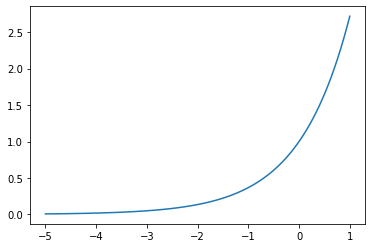

In [3]:
import numpy
from matplotlib import pyplot
plot_x = numpy.linspace(-5, 1, 100)
pyplot.plot(plot_x, [numpy.exp(x) for x in plot_x])
pyplot.show()

If we add $c = - \max(x)$ to the $x$ vector, then necessarily all $x$ values will be less than or equal to 1. As we can see in the graph, for $x \leq 1$, the $e^x$ value will always be between (0, 1]. I imagine this could be useful to keep values controlled. $e^x$ grows incredibly fast, if you calculated $e^x$ with a some large $x$ value you could overrun your float value and get numerical error. Because $softmax(x + c) = softmax(x)$ when there's no numerical error, using $c = - \max(x)$ will keep all the numerator values contained. For the record, $x_i$ values higher than this would lead to a float overrun on this system:

In [8]:
import numpy
from sys import float_info
print("x value where e^x is the maximum representable by float: {}".format(numpy.log(float_info.max)))
print("This is not very large!")

x value where e^x is the maximum representable by float: 709.782712893384
This is not very large!


### Q1.2

Softmax can be written as a three step processes, with $s_i = e^{x_i}$ , $S=\sum_i s_i$ and $softmax(x_i)= \frac{1}{S} s_i$.

#### Q1.2.1 (1 point WriteUp)
As $x \in \mathbb{R}^d$, what are the properties of $softmax(x)$, namely what is the range of each element? What is the sum over all elements?

**[What is the range of each element?]**

Each element is bounded by zero and one. This is because $e^x$ will always be greater than zero (so no element can be zero or less than zero) and because the denominator will always be greater than any individual numerator, being the sum of all numerators. Therefore no element can be one or greater.

**[What is the sum over all elements?]**

We know the sum over all elements adds to 1, because of the way that the denominator is structured. Basically the denominator for each ratio is the sum of all the numerators, so when you add all the ratios together you can combine all the numerators in a sum because of their shared denominator. Then you simply get $\sum_{j=1}^N x_j / \sum_{j=1}^N x_j = 1$.

In a very simple case ($e^{x_1} = a$, $e^{x_2} = b$, $e^{x_3} = c$) we can see this in action:

\begin{align*}
    \text{Sum over all elements} &= \frac{a}{a + b + c} + \frac{b}{a + b + c} + \frac{c}{a + b + c} \\
    &= \frac{a + b + c}{a + b + c} \\
    &= 1
\end{align*}

#### Q1.2.2 (1 point WriteUp)
One could say that ”softmax takes an arbitrary real valued vector $x$ and turns it into a ___”. Please think about a short phrase to fill in ___.

"probability". Because the sum of all elements add up to one and are bounded between (0, 1), you can treat the softmax product as a probability. I don't know how strongly it relates to the actually probability of certain events, but the structure of it fits and probably allows you to apply some related functions. Larger $x_i$ values will result in larger $softmax(x_i)$ values, which could be thought of as a higher probability.

A sort of related idea - when you flip a coin $x$ times, the term $2^x$ represents the total number of possible outcomes. Maybe $e^x$ is trying to relate to a similar branching set of random outcomes?

#### Q1.2.3 (1 point WriteUp)
Can you see the role of each step in the multi-step process now? Explain them.

If we're speaking in terms of probability, then you could interpret each step like so:

* $s_i = e^{x_i}$ : get the size of this input, converted to be positive by $e^x$. The size doesn't mean anything in particular until it is compared to the other values via normalization.
* $S = \sum_i s_i$ : get the total sum of all sizes. For probability, in certain circumstances this could be the count of all possible or observed actions.
* $softmax(x_i)= \frac{s_i}{S}$ : And here we scale each individual value by the total size, making the values a comparable proportion. The elements are now all (0, 1) and sum to 1. This is similar to saying "I counted 35 red shirts ($s_i$) out of 100 people ($S$) so the probability of a given person wearing a red shirt is $s_i / S = 0.35$".

### Q1.3 (3 points WriteUp)
Show that multi-layer neural networks without a non-linear activation function are equivalent to linear regression.

For starters we know that linear regression in a nueral net context just means a single linear layer, for example $Wx + b$. Training on this single linear layer would be linear regression. So, what we are trying to show is that multiple stacked linear layers collapse to this simple format. For demonstration purposes, let's consider a three-layer simple perceptron that only has a single weight and bias per layer. $x$ is the input, $y$ is the output, and $a_1$, $a_2$ represent intermediate values.

\begin{align*}
    a_1 &= W_1 x + b_1 \\
    a_2 &= W_2 a_1 + b_2 \\
    y &= W_3 a_2 + b_3 \\
\end{align*}

Now we can start combining terms to show that this reduces to a single linear equation, where the final weight and bias are combinations of the given terms.

\begin{align*}
    a_2 &= W_2 (W_1 x + b_1) + b_2 \\
    &= W_2W_1 x + (W_2 b_1 + b_2) \\
    &= W_{21} x + b_{21}  && W_{21} = W_2 W_1 & b_{21} = W_2 b_1 + b_2 \\
    y &= W_3 (W_{21} x + b_{21}) + b_3 \\
    &= W_3W_{21} x + (W_3 b_{21} + b_3) \\
    &= W_{321} x + b_{321}  && W_{321} = W_3W_{21} & b_{321} = W_3 b_{21} + b_3 \\
\end{align*}

And there we go. By extension, this same sort of procedure applies to arbitrary depths. When no non-linearities are introduced you can reduce stacked linear operations to a single linear operation.

### Q1.4 (4 points WriteUp) 
Given the sigmoid activation function $\sigma(x) = \frac{1}{1+e^{-x}}$ , derive the gradient of the sigmoid function and show that it can be written as a function of $\sigma(x)$ (without having access to $x$ directly)

**[Derive the gradient of the sigmoid function]**

\begin{align*}
    \frac{d}{dx} \sigma (x) &= \frac{d}{dx} (1 + e^{-x})^{-1} \\
    &= -1 (1 + e^{-x})^{-2} * \left( \frac{d}{dx} (1 + e^{-x}) \right) \\
    &= -1 (1 + e^{-x})^{-2} * (-e^{-x}) \\
    &= \frac{e^{-x}}{(1 + e^{-x})^2}
\end{align*}

**[Show that it can be written as a function of $\sigma(x)$]**

The part on the bottom is obviously $\sigma^2$, but to get the top element you need $1/\sigma - 1$. Let's see how that simplifies:
\begin{align*}
    \frac{d}{dx} \sigma (x) &= \frac{e^{-x}}{(1 + e^{-x})^2} \\
    &= \sigma(x)^2 \left( \frac{1}{\sigma(x)} - 1 \right) \\
    &= \sigma(x) - \sigma(x)^2 \\
    &= \sigma(x) (1 - \sigma(x)) \\
\end{align*}

That's a nice pretty result, cool.

### Q1.5 (12 points WriteUp)

Given $y = W x + b$ (or $y_j = \sum_{i=1}^d  x_{i} W_{ji} + b_j$), and the gradient of some loss $J$ with respect $y$, show how to get $\frac{\partial J}{\partial W}$, $\frac{\partial J}{\partial x}$ and $\frac{\partial J}{\partial b}$. Be sure to do the derivatives with scalars and re-form the matrix form afterwards. Here are some notional suggestions.
$$ \frac{\partial J}{\partial y} = \delta \in \mathbb{R}^{k \times 1} \quad W \in \mathbb{R}^{k \times d} \quad x \in \mathbb{R}^{d \times 1} \quad b \in \mathbb{R}^{k \times 1}$$
    

We can calculate $\frac{\partial J}{\partial W}$ using the chain rule like so: $\frac{\partial J}{\partial W} = \frac{\partial J}{\partial y} \frac{\partial y}{\partial W}$. To get $\frac{\partial y}{\partial W}$ let's take the derivative of the linear equation, first with scalars and then matrices:

\begin{align*}
    y_j &= \sum_{i=1}^d (x_i W_{ji}) + b_j \\
    \frac{\partial y_j}{\partial W_{ji}} &= x_i \\
    \frac{\partial y_j}{\partial W_j} &= \begin{bmatrix} x_1 & x_2 & ... & x_d \end{bmatrix} \\
    \frac{\partial y_j}{\partial W} &= \begin{bmatrix}
        0 & 0 & ... & 0 \\
        \vdots & \vdots & \vdots & \vdots \\
        x_1 & x_2 & ... & x_d \\
        \vdots & \vdots & \vdots & \vdots \\
        0 & 0 & ... & 0 \\
    \end{bmatrix} && \text{Non-zero on the $j$th row, $k \times d$} \\
    \frac{\partial y}{\partial W} &= \text{Stacked matrix of $k \times k \times d$, where the $j$th frame is $\partial y_j / \partial W$}
\end{align*}

We can calculate $\frac{\partial J}{\partial x}$ using the chain rule like so: $\frac{\partial J}{\partial x} = \frac{\partial J}{\partial y} \frac{\partial y}{\partial x}$. To get $\frac{\partial y}{\partial x}$ let's take the derivative of the linear equation, first with scalars and then matrices:

\begin{align*}
    y_j &= \sum_{i=1}^d (x_i W_{ji}) + b_j \\
    \frac{\partial y_j}{\partial x_i} &= W_{ji} \\
    \frac{\partial y_j}{\partial x} &= \begin{bmatrix} W_{j1} & W_{j2} & ... & W_{jd} \end{bmatrix} \\
    \frac{\partial y}{\partial x} &= \begin{bmatrix}
        W_{11} & W_{12} & ... & W_{1d} \\
        W_{21} & W_{22} & ... & W_{2d} \\
        \vdots & \vdots & \vdots & \vdots \\
        W_{k1} & W_{k2} & ... & W_{kd} \\
    \end{bmatrix} \\
\end{align*}

We can calculate $\frac{\partial J}{\partial b}$ using the chain rule like so: $\frac{\partial J}{\partial b} = \frac{\partial J}{\partial y} \frac{\partial y}{\partial b}$. To get $\frac{\partial y}{\partial b}$ let's take the derivative of the linear equation, first with scalars and then matrices:

\begin{align*}
    y_j &= \sum_{i=1}^d (x_i W_{ji}) + b_j \\
    \frac{\partial y_j}{\partial b_j} &= 1 \\
    \frac{\partial y}{\partial b} &= \begin{bmatrix}
        1 \\
        1 \\
        \vdots \\
        1 \\
    \end{bmatrix} \\
\end{align*}

### Q1.6 (15 points WriteUp)

We will find the derivatives for Conv layers now. Since most Deep Learning frameworks such as Pytorch, Tensorflow use cross-correlation in their respective "convolution" functions ([Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d) and [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/nn/convolution)), we will continue this abuse of notation. So the operation performed with the Conv Layer weights will be cross-correlation.
    
The input, $x$ is of shape $M\times N$ with C channels. This will be *convolved* (actually cross-correlation) with $D$ number of $K\times K$ filters, each with a bias term. The stride is 1 and there will be no padding. We know the gradient of some loss $J$ with respect to the output $y$, which will have $D$ channels. Show how to get $\frac{\partial J}{\partial W}$, $\frac{\partial J}{\partial x}$ and $\frac{\partial J}{\partial b}$.

The dimensions and notation are as follows:
$$
    \frac{\partial J}{\partial y} = \delta \in \mathbb{R}^{D\times M_o \times N_o}
    \quad
    M_o = M-K+1
    \quad
    N_o = N-K+1
$$
$$
    x \in \mathbb{R}^{C\times M \times N}
    \quad
    W \in \mathbb{R}^{D\times C \times K \times K}
    \quad
    b \in \mathbb{R}^{D}
$$

$x_{c, i, j}:$ The element at the $i^{th}$ row, the $j^{th}$ column and the $c^{th}$ channel of the input

$y_{c, i, j}:$ The element at the $i^{th}$ row, the $j^{th}$ column and the $c^{th}$ channel of the output

$W_{d, c, i, j}:$ The element at the $i^{th}$ row, the $j^{th}$ column, the $c^{th}$ channel of the kernel of the $d^{th}$ filter

*For this question, you may compute the derivatives with scalars only. You don't need to re-form the matrix*
    

Okay, as seen in the last question what we really need to do (since the $\frac{\partial J}{\partial y}$ term is already known) is calculate $\frac{\partial y}{\partial W}$, $\frac{\partial y}{\partial x}$ and $\frac{\partial y}{\partial b}$. Let's take a look at $W$ first, computing for scalars only (not reforming the matrix). Before doing that, let's define $\lambda = floor(K / 2)$. That way $\sum_{j'=j-\lambda}^{j+\lambda} \sum_{i'=i-\lambda}^{i+\lambda} x_{i'j'}$ will represent the $K \times K$ area around $ij$. For example, if we had a $K$ filter side length of 5, then $\lambda = 2$ and we would be looking at the area around, for example, [9, 10, 11, 12, 13] if $i$ started off as 11 (from $i-2$ to $i+2$).

\begin{align*}
    y_{dij} &= W_d x_{ij} + b_d \\
    &= \left[ \sum_{c=1}^C \left(
        \sum_{j'=j-\lambda}^{j+\lambda} \sum_{i'=i-\lambda}^{i+\lambda} W_{dci'j'} x_{i'j'}
    \right) \right] + b_d && \text{The whole set of sums represents a single 3D convolution operation.}
\end{align*}

To recap the above math in English, to solve for a single point in the output ($y_{dij}$) we take the $d$th filter in $W$ and apply it ($1 \times C \times K \times K$) to a single location in the input $x$. The $K \times K$ filter window affects a group of $x$ points on a single layer, and the $C$ depth of the weights makes that same sort of $K \times K$ filter effect apply to every channel of the input. In support of this representation, here's a drawing I made of the process:

<!-- 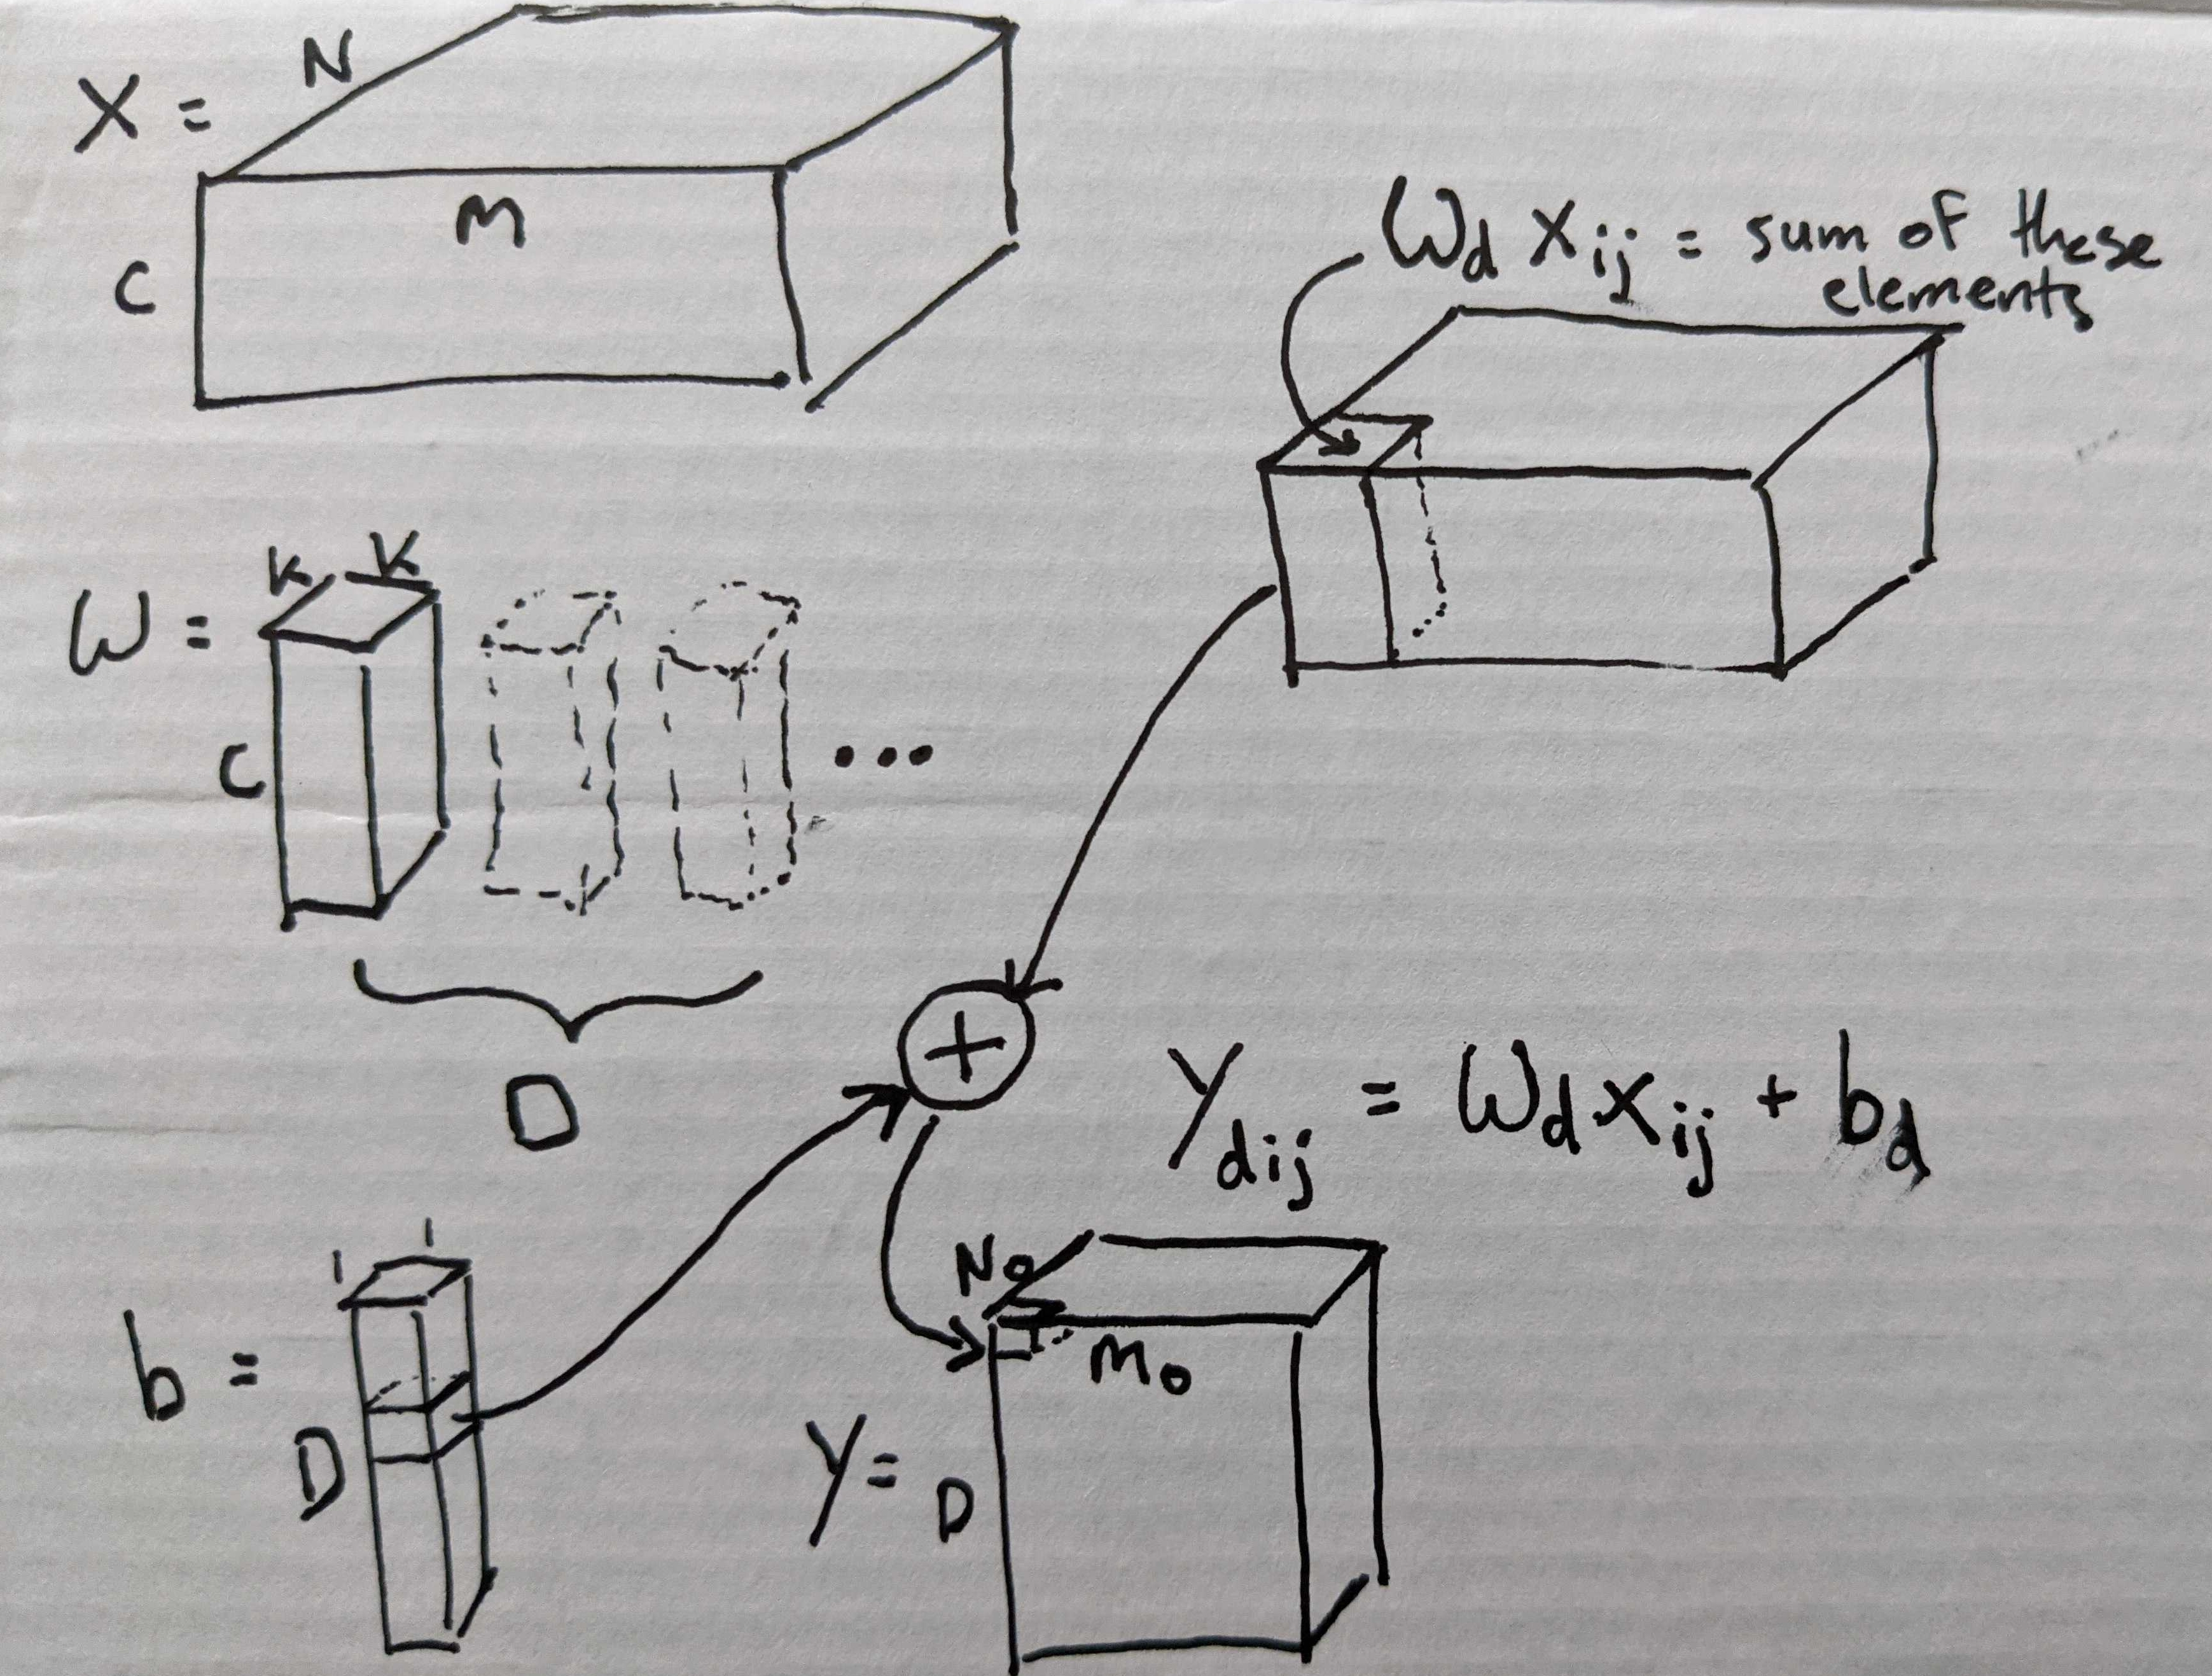 -->
<!-- <img src="" alt="Drawing" style="width: 200px;"/> -->
<div>
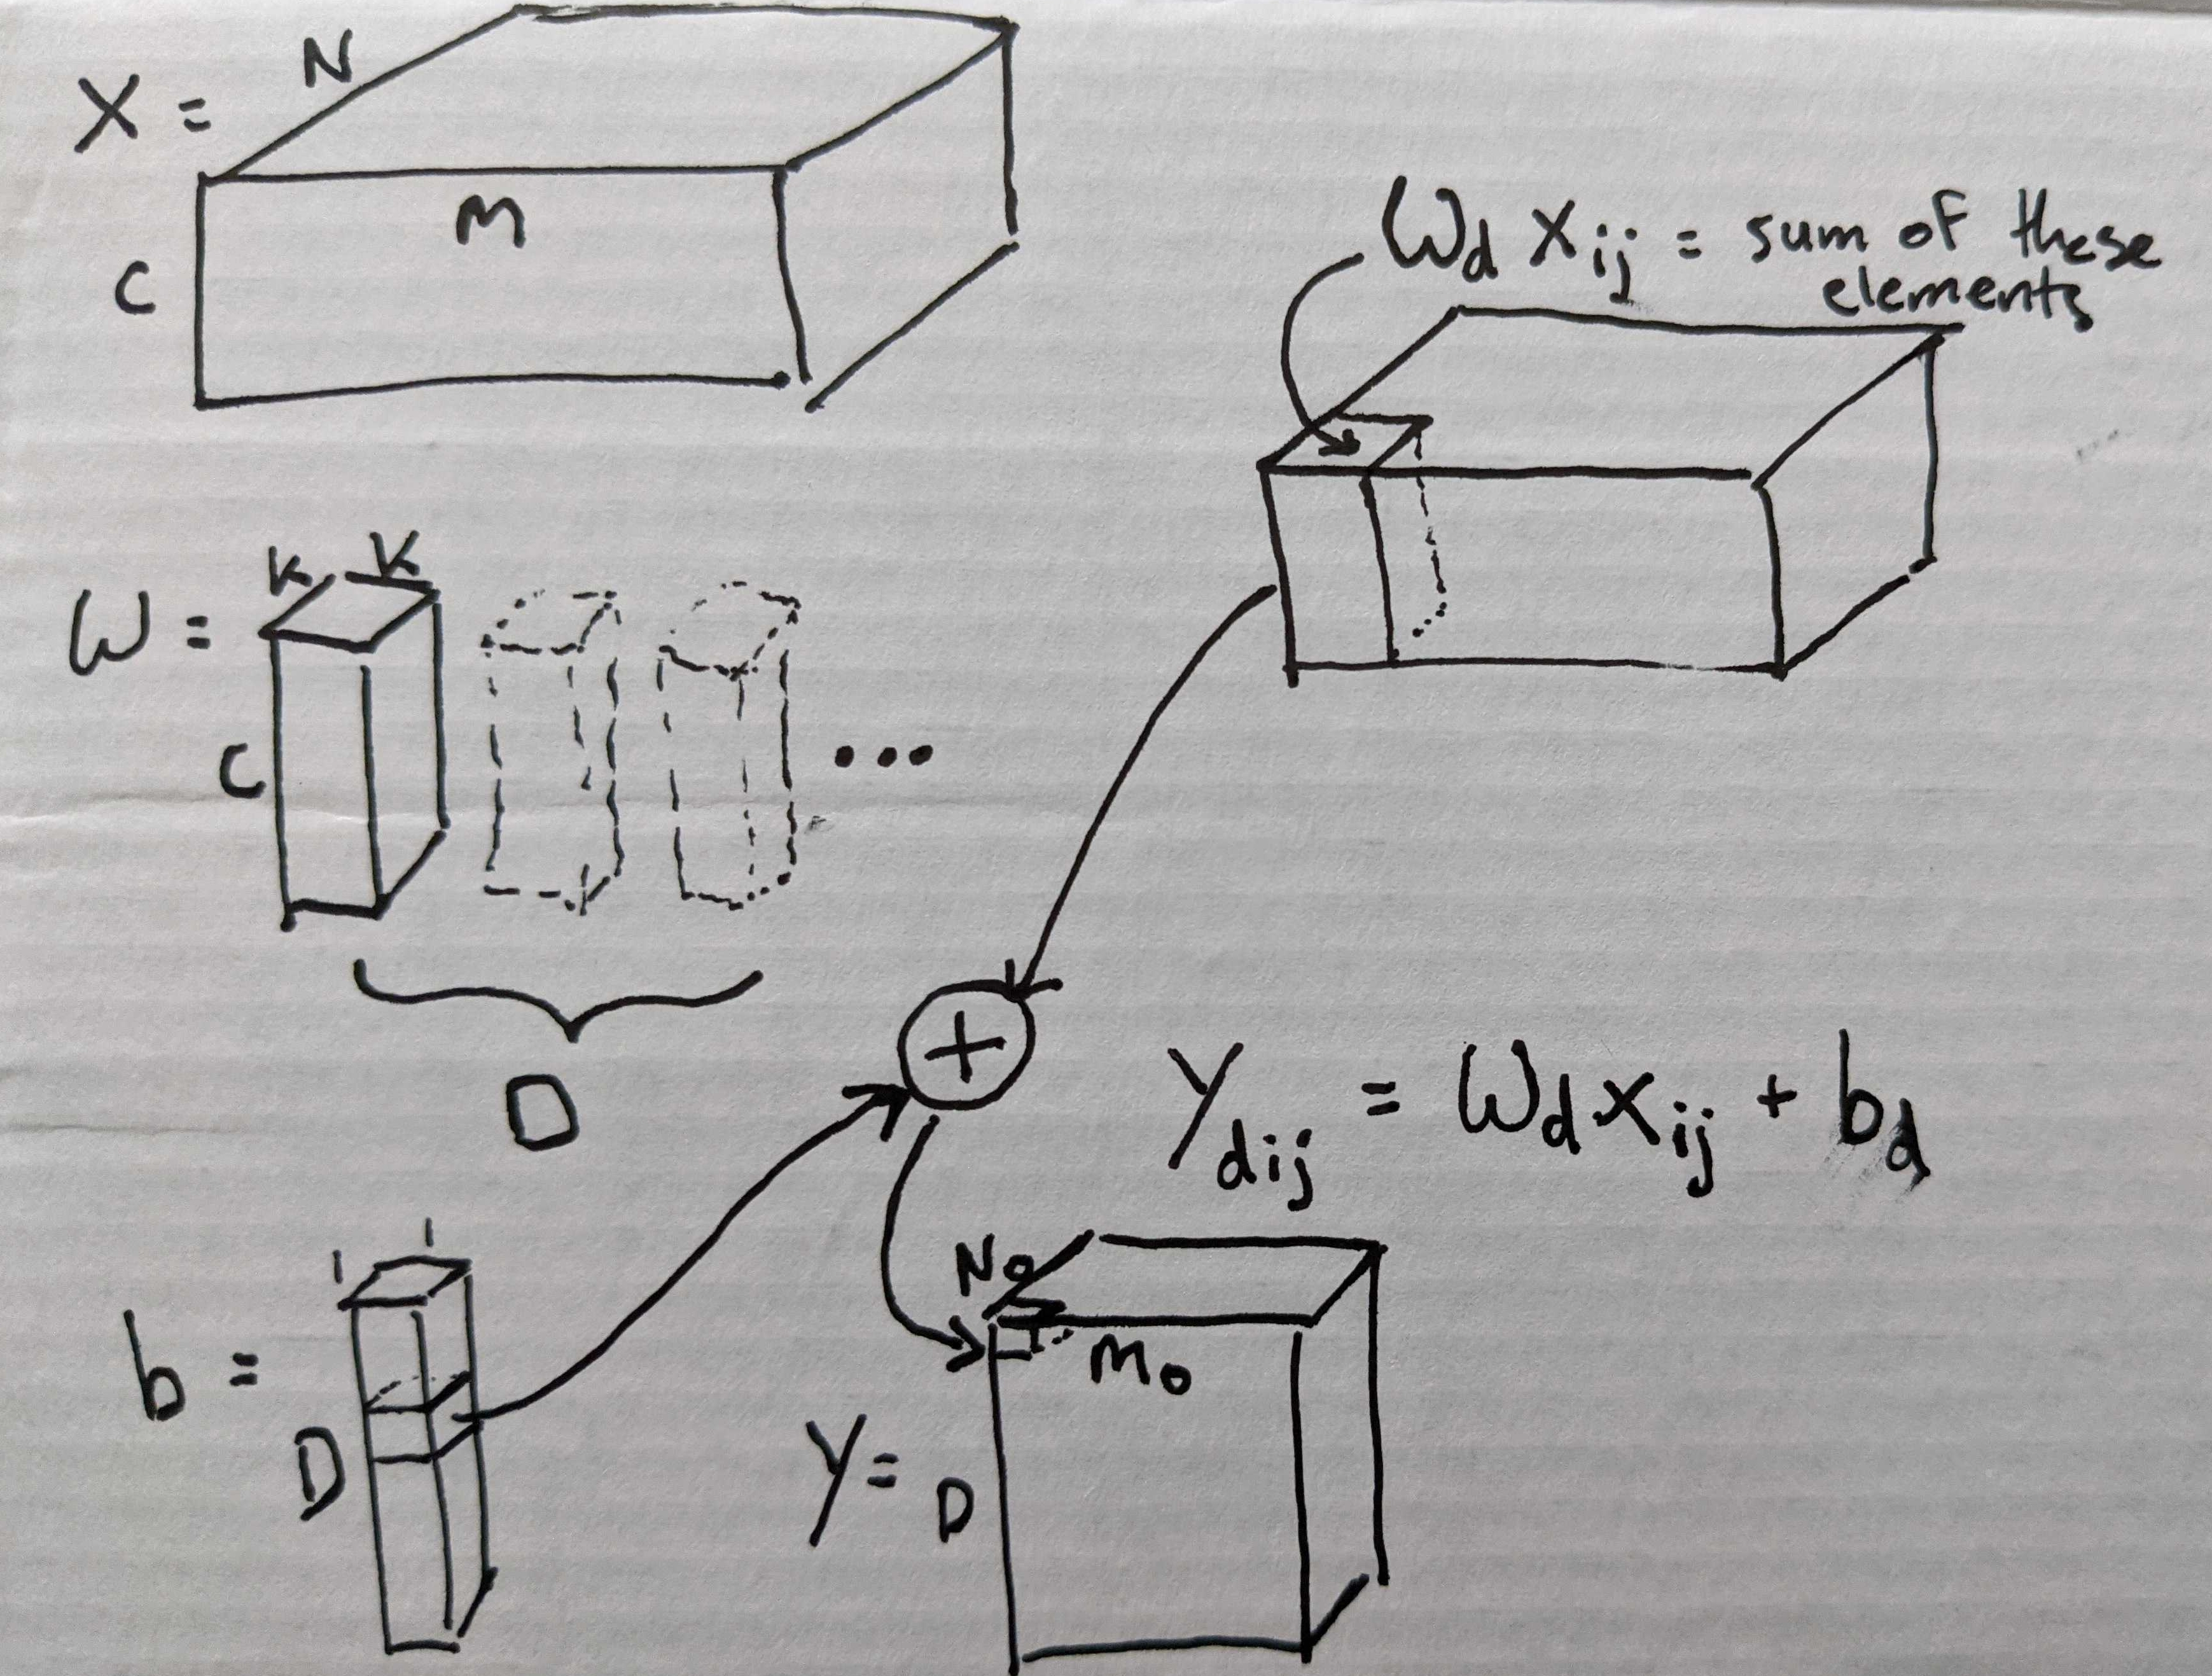
</div>

Now we can try to look at gradients. We can calculate $\frac{\partial J}{\partial W}$ using the chain rule like so: $\frac{\partial J}{\partial W} = \frac{\partial J}{\partial y} \frac{\partial y}{\partial W}$. To get $\frac{\partial y}{\partial W}$ let's take the derivative of the linear equation. As stated in the problem I will solve this for a scalar (single element in the sum) and not reform it into a vector or matrix.

\begin{align*}
    y_{dij} &=
    \left[ \sum_{c=1}^C \left(
        \sum_{j'=j-\lambda}^{j+\lambda} \sum_{i'=i-\lambda}^{i+\lambda} W_{dci'j'} x_{i'j'}
    \right) \right] + b_d \\
    \frac{\partial y_{dij}}{\partial W_{dci'j'}} &= x_{i'j'} \\
\end{align*}

We can calculate $\frac{\partial J}{\partial x}$ using the chain rule like so: $\frac{\partial J}{\partial x} = \frac{\partial J}{\partial y} \frac{\partial y}{\partial x}$. To get $\frac{\partial y}{\partial x}$ let's take the derivative of the linear equation.

\begin{align*}
    y_{dij} &=
    \left[ \sum_{c=1}^C \left(
        \sum_{j'=j-\lambda}^{j+\lambda} \sum_{i'=i-\lambda}^{i+\lambda} W_{dci'j'} x_{i'j'}
    \right) \right] + b_d \\
    \frac{\partial y_{dij}}{\partial x_{i'j'}} &= \sum_{c=1}^C W_{dci'j'} \\
\end{align*}

We can calculate $\frac{\partial J}{\partial b}$ using the chain rule like so: $\frac{\partial J}{\partial b} = \frac{\partial J}{\partial y} \frac{\partial y}{\partial b}$. To get $\frac{\partial y}{\partial b}$ let's take the derivative of the linear equation.

\begin{align*}
    y_{dij} &=
    \left[ \sum_{c=1}^C \left(
        \sum_{j'=j-\lambda}^{j+\lambda} \sum_{i'=i-\lambda}^{i+\lambda} W_{dci'j'} x_{i'j'}
    \right) \right] + b_d \\
    \frac{\partial y_{dij}}{\partial b_{d}} &= 1 \\
\end{align*}

### Q1.7

When the neural network applies the elementwise activation function (such as sigmoid), the gradient of the activation function scales the back-propagation update. This is directly from the chain rule, $\frac{d}{d x} f(g(x)) = f'(g(x)) g'(x)$.

#### Q1.7.1 (1 point WriteUp)
Consider the sigmoid activation function for deep neural networks. Why might it lead to a "vanishing gradient" problem if it is used for many layers (consider plotting the $\sigma'(x)$ in Q1.4)?

We know the sigmoid function looks like so:

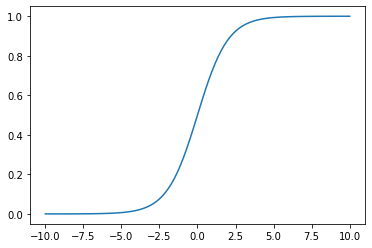

In [10]:
import numpy
from matplotlib import pyplot
def sigmoid(x):
    return 1 / (1 + numpy.exp(-x))
plot_x = numpy.linspace(-10, 10, 100)
pyplot.plot(plot_x, sigmoid(plot_x))
pyplot.show("sigmoid")
pyplot.show()

However, I'm not sure off the top of my head what the derivative of that looks like. Let's plot it:

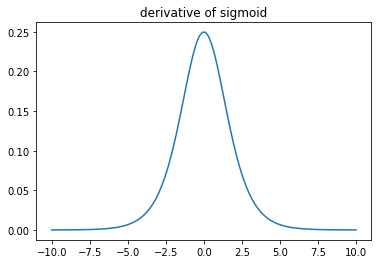

In [9]:
pyplot.plot(plot_x, sigmoid(plot_x) * (1 - sigmoid(plot_x)))
pyplot.title("derivative of sigmoid")
pyplot.show()

Alright, that looks very guassian. Since $e^{-x}$ terms are involved, it's possible it is actually a gaussian once you rearrange terms. Not only would this really damp down terms away from 0, but even right at $x=0$ the value is only $\approx 0.25$. As I understand it, the vanishing gradient problem is that when you have a very deep network, the back-propagation updates peter off and vanish as you try to work towards the front end of the network. That makes sense looking at this graph, since at every stage with a sigmoid you will be multiplying the back-propagation value by a value that is **at most** $\approx 0.25$ and could be something much smaller. Each layer will damp that gradient term down and down until it vanishes.

#### Q1.7.2 (1 point WriteUp)
Often it is replaced with $\tanh(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$. What are the output ranges of both $\tanh$ and sigmoid? Why might we prefer $\tanh$ ? 

As we can see in the plot below, tanh has a range from -1 to 1, instead of the 0 to 1 range that sigmoid has. One reason we might want to use tanh is that it is centered around 0, which could lead to weights distributed evenly around 0. That seems like it could have some nice effects, rather than the sigmoid being arbitrarily centered around 0.5. However, below the tanh graph you can see the graph of the derivative of tanh. It has a value of 1 in the center! This should hopefully address the vanishing gradient problem to some extent, allowing backpropagation signals to "travel further back" along the network.

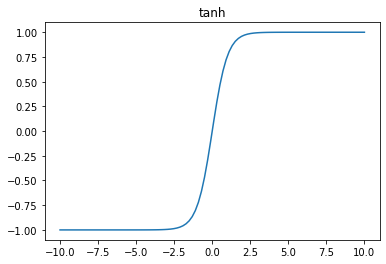

In [11]:
pyplot.plot(plot_x, numpy.tanh(plot_x))
pyplot.title("tanh")
pyplot.show()

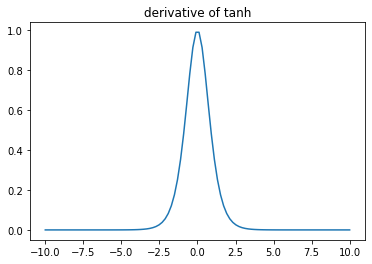

In [12]:
pyplot.plot(plot_x, 1 / numpy.cosh(plot_x)**2)
pyplot.title("derivative of tanh")
pyplot.show()

#### Q1.7.3 (1 point WriteUp)
Why does $\tanh(x)$ have less of a vanishing gradient problem? (plotting the derivatives helps! for reference: $\tanh'(x) = 1 - \tanh(x)^2$)

I discussed this and showed a graph of the derivative as part of 1.7.2, see above. Basically the derivative seems to have a max value of 1 in the center, hopefully causing less of a damping effect on weights over multiple layers. It appears to damp more quickly than sigmoid as $x$ goes away from 0 though, so that will have some sort of damping effect on backprop.

#### Q1.7.4 (1 point WriteUp)
$\tanh$ is a scaled and shifted version of the sigmoid. Show how $\tanh(x)$ can be written in terms of $\sigma(x)$. (*Hint: consider how to make it have the same range*)

Well, theoretically it seems like we'd want to start off by scaling sigmoid by 2 (making the range 0 to 2) and then subtract 1, making the range -1 to 1. In addition, those $2x$ terms in the tanh equation are somewhat difficult to get just by combining $e^{-x}$ values, so lets try scaling $x$ as well.

\begin{align*}
    \sigma(2x) &= \frac{1}{1 + e^{-2x}} \\
    2 \sigma(2x) - 1 &= \frac{2}{1 + e^{-2x}} - 1 \\
    &= \frac{2}{1 + e^{-2x}} - \frac{1 + e^{-2x}}{1 + e^{-2x}} \\
    &= \frac{2 - 1 - e^{-2x}}{1 + e^{-2x}} \\
    &= \frac{1 - e^{-2x}}{1 + e^{-2x}} \\
    &= \tanh(x) \\
\end{align*}

***
## For the following questions, please find the instructions in the corresponding jupyter notebooks.

## Q2 Implement a Fully Connected Network (65 points + 10 Extra Credit)

#### Q2.1.1 (3 points WriteUp)

**[Why is it not a good idea to initialize a network with all zeros?]**
It seems like if the weights and biases for the network are all zero, then not only will every input map to an output of zero, but since all outputs map to an identical answer there is no basis on which to compute a useful gradient. Since all the weights and biases will have the exact same value, any calculated gradient will be the same for all nodes, since the network can't tell which weights are having any particular effect.

**[If you imagine that every layer has weights and biases, what can a zero-initialized network output after training?]**
If we imagine a linear equation $Wx + b$ where all the weights and biases are zero, then no matter what the input will be the output will be zero on startup. After training, since all the weights will be updated en masse (since there's no distinguishing information between the terms) the output will just be a constant value.

#### Q2.1.3 (2 points WriteUp)

**[Why do we initialize with random numbers?]**

Random initialization makes sense because it "gives personality" to the weights. By that I just mean that once there are differences between the weights and they're not all uniform the gradient process can start making different changes to different weights. We want the network to make different pathways learn different responses to the inputs.

**[Why do we scale the initialization depending on layer size? (see near Fig 6 in Xavier initialization)]**

According to Glorot and Bengio (as seen in the referenced Figure 6) if you scale the initialization depending on the layer size then then variation in the weights would be maintained from layer to layer. As seen in Figure 7 in their paper, the gradient variation is also maintained between layers using this initialization! I think this is important since it means that as you back-propagate the gradient terms don't get progressively damped down layer by layer. In Figures 6 and 7 you can see the deeper layers have much higher weights and much lower gradients than other layers when using "standard" initialization, and are fairly consistent layer to layer when using Xavier initialization.

## Q3 Training Models (20 Points)

### Q3.2 (3 points Code+WriteUp)

YOUR ANSWER HERE

### Q3.3 (2 points Code+WriteUp)

YOUR ANSWER HERE

### Q3.4 (3 points Code+WriteUp)

YOUR ANSWER HERE

### Q3.5 (4 points Code+WriteUp)

YOUR ANSWER HERE

## Q4 Extract Text from Images (35 points)

### Q4.1 (3 points WriteUp)

YOUR ANSWER HERE

### Q4.2 (13 points Code+WriteUp)

YOUR ANSWER HERE

### Q4.3 (6 points WriteUp)

YOUR ANSWER HERE

### Q4.4 (13 points Code+WriteUp)

YOUR ANSWER HERE

## Q5 Image Compression with Autoencoders [Extra Credit](25 points)

#### Q5.1.1 [Extra Credit](10 points Code)

YOUR ANSWER HERE

### Q5.2 [Extra Credit](3 points Code+WriteUp)

YOUR ANSWER HERE

#### Q5.3.1 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

#### Q5.3.2 [Extra Credit](3 points Code+WriteUp)

YOUR ANSWER HERE

## Q6 Comparing against PCA [Extra Credit](15 Points)

### Q6.1 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

### Q6.2 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

### Q6.3 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

### Q6.4 [Extra Credit](3 points Code+WriteUp)

YOUR ANSWER HERE

## Q7 PyTorch (40 points)

#### Q7.1.1 (10 points Code+WriteUp)

YOUR ANSWER HERE

#### Q7.1.2 (3 points Code+WriteUp)

YOUR ANSWER HERE

#### Q7.1.3 (2 points Code+WriteUp)

YOUR ANSWER HERE

#### Q7.1.4 (15 points Code+WriteUp)

YOUR ANSWER HERE

#### Q7.2.1 (10 points WriteUp)

YOUR ANSWER HERE

## Appendix: Neural Network Overview
Deep learning has quickly become one of the most applied machine learning techniques in computer vision. Convolutional neural networks have been applied to many different computer vision problems such as image classification, recognition, and segmentation with great success. In this assignment, you will first implement a fully connected feed forward neural network for hand written character classification. Then in the second part, you will implement a system to locate characters in an image, which you can then classify with your deep network. The end result will be a system that, given an image of hand written text, will output the text contained in the image.

### Basic Use
Here we will give a brief overview of the math for a single hidden layer feed forward network. For a more detailed look at the math and derivation, please see the class slides.

A fully-connected network $\textbf{f}$, for classification, applies a series of linear and non-linear functions to an input data vector $\textbf{x}$ of size $N\times 1$ to produce an output vector $\textbf{f}(\textbf{x})$ of size $C\times 1$, where each element $i$ of the output vector represents the probability of $\textbf{x}$ belonging to the class $i$. Since the data samples are of dimensionality $N$, this means the input layer has $N$ input units. To compute the value of the output units, we must first compute the values of all the hidden layers. The first hidden layer *pre-activation* $\textbf{a}^{(1)}(\textbf{x})$ is given by

$$\textbf{a}^{(1)}(\textbf{x}) = \textbf{W}^{(1)}\textbf{x} + \textbf{b}^{(1)}$$

Then the *post-activation* values of the first hidden layer $\textbf{h}^{(1)}(\textbf{x})$ are computed by applying a non-linear activation function $\textbf{g}$ to the *pre-activation* values

$$\textbf{h}^{(1)}(\textbf{x}) = \textbf{g}(\textbf{a}^{(1)}(\textbf{x})) = \textbf{g}(\textbf{W}^{(1)}\textbf{x} + \textbf{b}^{(1)})$$

Subsequent hidden layer ($1 < t \leq T$) pre- and post activations are given by:

$$\textbf{a}^{(t)}(\textbf{x}) = \textbf{W}^{(t)}\textbf{h}^{(t-1)} + \textbf{b}^{(t)}$$

$$\textbf{h}^{(t)}(\textbf{x}) = \textbf{g}(\textbf{a}^{(t)}(\textbf{x}))$$

The output layer *pre-activations* $\textbf{a}^{(T)}(\textbf{x})$ are computed in a similar way

$$\textbf{a}^{(T)}(\textbf{x}) = \textbf{W}^{(T)}\textbf{h}^{(T-1)}(\textbf{x}) + \textbf{b}^{(T)}$$

and finally the \emph{post-activation} values of the output layer are computed with
$$\textbf{f}(\textbf{x}) = \textbf{o}(\textbf{a}^{(T)}(\textbf{x})) = \textbf{o}(\textbf{W}^{(T)}\textbf{h}^{(T-1)}(\textbf{x}) + \textbf{b}^{(T)})$$

where $\textbf{o}$ is the output activation function. Please note the difference between $\textbf{g}$ and $\textbf{o}$! 
For this assignment, we will be using the sigmoid activation function for the hidden layer, so:
$$\textbf{g}(y) = \frac{1}{1+\exp(-y)}$$
where when $\textbf{g}$ is applied to a vector, it is applied element wise across the vector.

Since we are using this deep network for classification, a common output activation function to use is the softmax function. This will allow us to turn the real value, possibly negative values of $\textbf{a}^{(T)}(\textbf{x})$ into a set of probabilities (vector of positive numbers that sum to 1). Letting $\textbf{x}_i$ denote the $i^{th}$ element of the vector $\textbf{x}$, the softmax function is defined as:
$$\textbf{o}_i(\textbf{y}) = \frac{\exp(\textbf{y}_i)}{\sum_j \exp(\textbf{y}_j)}$$

![](figures/letter_montage.jpg)
<center>Samples from NIST Special 19  dataset</center>


Gradient descent is an iterative optimisation algorithm, used to find the local optima. To find the local minima, we start at a point on the function and move in the direction of negative gradient (steepest descent) till some stopping criteria is met.

### Backprop
The update equation for a general weight $W^{(t)}_{ij}$ and bias $b^{(t)}_i$ is
$$
W^{(t)}_{ij} = W^{(t)}_{ij} - \alpha*\frac{\partial L_{\textbf{f}}}{\partial W^{(t)}_{ij}}(\textbf{x})\hspace{1cm}
b^{(t)}_{i} = b^{(t)}_{i} - \alpha*\frac{\partial L_{\textbf{f}}}{\partial b^{(t)}_{i}}(\textbf{x})
$$
$\alpha$ is the learning rate. Please refer to the back-propagation slides for more details on how to derive the gradients. Note that here we are using softmax loss (which is different from the least square loss in the slides).

## References

[1]  Xavier Glorot and Yoshua Bengio. Understanding the difficulty of training deep feedforward neural networks. 2010. http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf.

[2]  P. J. Grother. Nist special database 19 – handprinted forms and characters database. https://www.nist.gov/srd/nist-special-database-19, 1995.